In [1]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, StratifiedKFold

#Layer 7

In [3]:
names=[]
# Assign column names to the dataset
for i in range(1,769):
 names.append("feature_"+str(i))
labels=["label_1","label_2","label_3","label_4"]
names+=labels

# Read in the dataset
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mini_project/DataSet_L7/train.csv')
valid_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mini_project/DataSet_L7/valid.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mini_project/DataSet_L7/test.csv')

In [4]:
from sklearn.preprocessing import RobustScaler

x_train ={}
y_train ={}
x_valid ={}
y_valid ={}
x_test = {}

df_t = train_df
df_v = valid_df

for label in labels:
  scaler = RobustScaler()
  if label == 'label_2':
    df_t = train_df.dropna()
    df_v = valid_df.dropna()

  x_train[label] = scaler.fit_transform(df_t.drop(labels, axis=1))
  y_train[label] = df_t[label]
  x_valid[label] = scaler.transform(df_v.drop(labels, axis=1))
  y_valid[label] = df_v[label]
  x_test[label] = scaler.transform(test_df.drop(['ID'], axis=1))




##Label 1

In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with a desired number of components (e.g., n_components=50)
pca = PCA(n_components=400)

# Fit PCA on your training data
x_train_pca_l1 = pca.fit_transform(x_train['label_1'])

# Transform your validation and test data using the same PCA model
x_valid_pca_l1 = pca.transform(x_valid['label_1'])
x_test_pca_l1 = pca.transform(x_test['label_1'])  # If you have a test set

# Now, you can use x_train_pca_l1, x_valid_pca_l1, and x_test_pca_l1 as your reduced-dimensional feature vectors for modeling.
x_train_pca_l1.shape

(28520, 400)

In [ ]:
# svm_classifier_l1 = SVC(class_weight='balanced' ,C=10, degree=1, gamma='auto', kernel='poly') #=0.97
svm_classifier_l1 = SVC(class_weight='balanced' ,C=100, degree=3,  kernel='rbf') #0.98
svm_classifier_l1.fit(x_train_pca_l1, y_train['label_1'])

# Make predictions on the test data
y_pred = svm_classifier_l1.predict(x_valid_pca_l1)

# Evaluate model performance
print(accuracy_score(y_valid['label_1'], y_pred))

0.9813333333333333


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

svm_classifier_l1 = SVC(class_weight='balanced' ,C=100, degree=3,  kernel='linear') #0.98
svm_classifier_l1.fit(x_train_pca_l1, y_train['label_1'])

SVC(C=100, class_weight='balanced', kernel='linear')

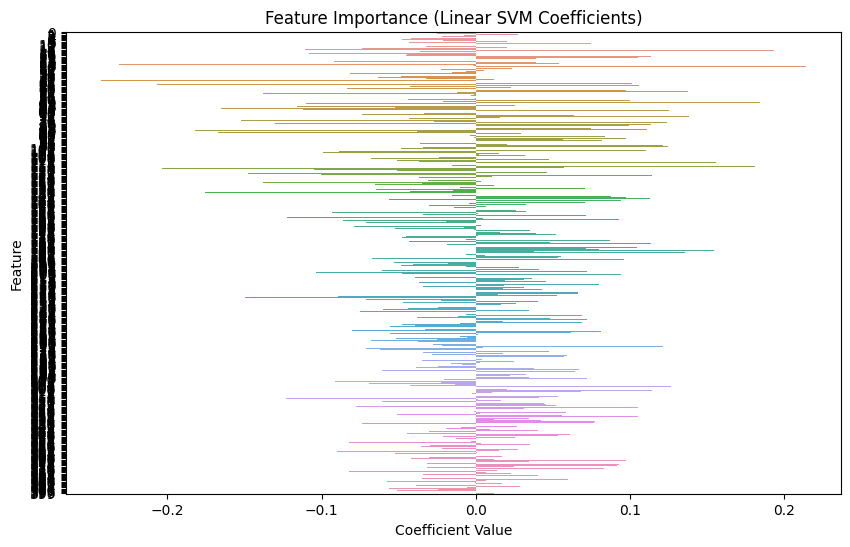

In [ ]:
# Get the coefficients (weights) from the linear SVM model
coefficients = svm_classifier_l1.coef_[0]  # For binary classification, use [0]

df=pd.DataFrame(x_train_pca_l1)
# Get the feature names from your dataset
feature_names =df.columns  # Replace with your actual feature names

# Create a DataFrame to store feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by their absolute coefficient values in descending order
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=True).index)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients_df['Coefficient'], y=coefficients_df['Feature'], orient='h')
plt.title('Feature Importance (Linear SVM Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# # Get the indices of support vectors
# support_vector_indices = svm_classifier_l1.support_

# # Create a DataFrame from your training data
# df = pd.DataFrame(x_train['label_1'])

# # Extract the support vectors from the training data
# support_vectors = df.values[support_vector_indices]

# # Get the coefficients associated with the support vectors
# coefficients = svm_classifier_l1.dual_coef_.ravel()
# print(df.shape)
# print(len(coefficients))
# # Create a DataFrame with feature names and their coefficients
# feature_importance_df = pd.DataFrame({'Feature': df.columns, 'Coefficient': coefficients[0]})

# # Sort the features by their absolute coefficient values in descending order
# feature_importance_df['Absolute Coefficient'] = np.abs(feature_importance_df['Coefficient'])
# feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# # Visualize the feature importance
# plt.figure(figsize=(10, 6))
# plt.barh(feature_importance_df['Feature'], feature_importance_df['Absolute Coefficient'])
# plt.xlabel("Absolute Coefficient (Feature Importance)")
# plt.ylabel("Feature")
# plt.title("Feature Importance Based on Support Vector Coefficients")
# plt.show()


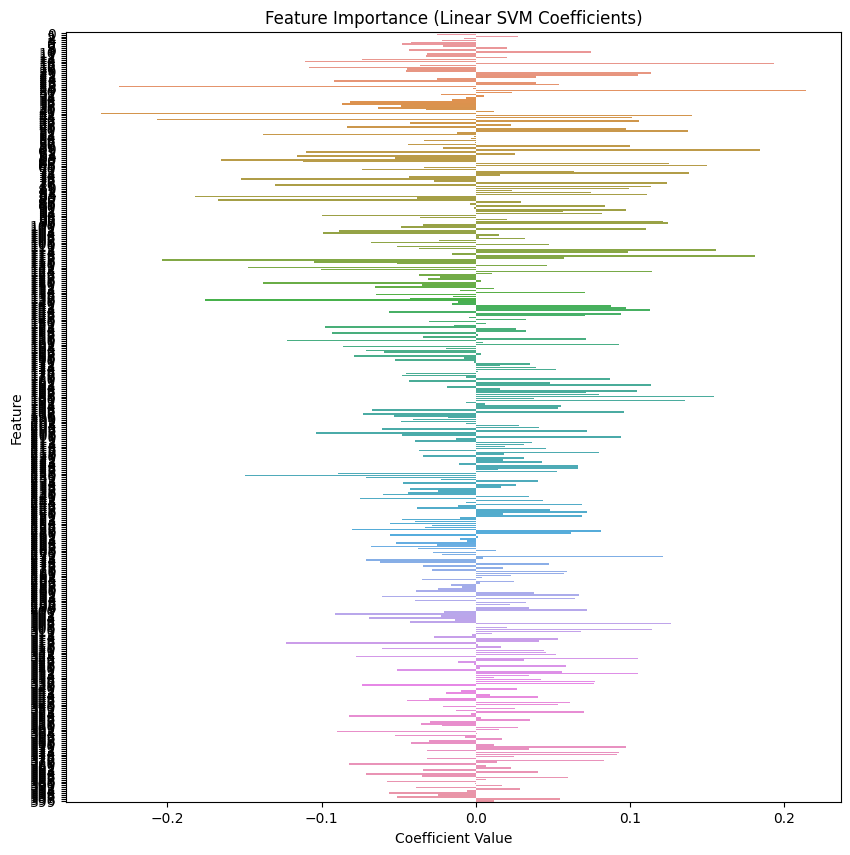

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x=coefficients_df['Coefficient'], y=coefficients_df['Feature'], orient='h')
plt.title('Feature Importance (Linear SVM Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [ ]:
coefficients_df

,Feature,Coefficient
340,340,-0.000022
298,298,0.000099
390,390,-0.000233
57,57,-0.000357
308,308,0.000376
...,...,...
118,118,-0.203728
45,45,-0.206939
30,30,0.213931
28,28,-0.231564


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(coefficients_df, *['Feature'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(coefficients_df, *['Coefficient'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(coefficients_df, *[[['Feature', 'Coefficient']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(coefficients_df, *['Feature'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(coefficients_df, *['Coefficient'], **{})
chart

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate permutation importance
result = permutation_importance(svm_classifier_l1, x_train_pca_l1, y_train['label_1'], n_repeats=30, random_state=0)

# Sort the features by their importance
sorted_indices = result.importances_mean.argsort()

# Create a list of feature names in the order of their importance
df=pd.DataFrame(x_train_pca_l1)
feature_names = df.columns
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, result.importances_mean[sorted_indices])
plt.title('Feature Importance (Permutation Importance)')
plt.xlabel('Importance')
plt.show()


##Label 2

In [5]:
from sklearn.decomposition import PCA

# Instantiate PCA with a desired number of components (e.g., n_components=50)
pca = PCA(n_components=0.97)

# Fit PCA on your training data
x_train_pca_l2 = pca.fit_transform(x_train['label_2'])

# Transform your validation and test data using the same PCA model
x_valid_pca_l2 = pca.transform(x_valid['label_2'])
x_test_pca_l2 = pca.transform(x_test['label_2'])  # If you have a test set

# Now, you can use x_train_pca_l2, x_valid_pca_l1, and x_test_pca_l1 as your reduced-dimensional feature vectors for modeling.
x_train_pca_l2.shape

(28040, 411)

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
# svm_classifier_l2 = SVC(class_weight='balanced' ,C=1, kernel='rbf') #0.9116847826086957
svm_classifier_l2 = SVC(class_weight='balanced' ,C=100, kernel='rbf', degree=4) #0.9524456521739131

svm_classifier_l2.fit(x_train_pca_l2, y_train['label_2'])

# Make predictions on the test data
y_pred = svm_classifier_l2.predict(x_valid_pca_l2)

# Evaluate model performance
print(accuracy_score(y_valid['label_2'], y_pred))

0.9524456521739131


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

svm_classifier_l1 = SVC(class_weight='balanced' ,C=100, kernel='linear', degree=4) #0.98
svm_classifier_l1.fit(x_train_pca_l2, y_train['label_2'])

In [ ]:
# Get the coefficients (weights) from the linear SVM model
coefficients = svm_classifier_l1.coef_[0]  # For binary classification, use [0]

df=pd.DataFrame(x_train_pca_l2)
# Get the feature names from your dataset
feature_names =df.columns  # Replace with your actual feature names

# Create a DataFrame to store feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by their absolute coefficient values in descending order
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=True).index)


In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x=coefficients_df['Coefficient'], y=coefficients_df['Feature'], orient='h')
plt.title('Feature Importance (Linear SVM Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [ ]:
coefficients_df

##Label 3

In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with a desired number of components (e.g., n_components=50)
pca = PCA(n_components=0.97)

# Fit PCA on your training data
x_train_pca_l3 = pca.fit_transform(x_train['label_3'])

# Transform your validation and test data using the same PCA model
x_valid_pca_l3 = pca.transform(x_valid['label_3'])
x_test_pca_l3 = pca.transform(x_test['label_3'])  # If you have a test set

# Now, you can use x_train_pca_l1, x_valid_pca_l1, and x_test_pca_l1 as your reduced-dimensional feature vectors for modeling.
x_train_pca_l3.shape

(28520, 411)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
svm_classifier_l3 = SVC(class_weight='balanced' ,C=50 ,kernel='rbf') #0.998641304347826
svm_classifier_l3.fit(x_train_pca_l3, y_train['label_3'])

# Make predictions on the test data
y_pred = svm_classifier_l3.predict(x_valid_pca_l3)

# Evaluate model performance
print(accuracy_score(y_valid['label_3'], y_pred))

0.9973333333333333


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

svm_classifier_l1 = SVC(class_weight='balanced' ,C=100, kernel='linear', degree=4) #0.98
svm_classifier_l1.fit(x_train_pca_l3, y_train['label_3'])

In [ ]:
# Get the coefficients (weights) from the linear SVM model
coefficients = svm_classifier_l1.coef_[0]  # For binary classification, use [0]

df=pd.DataFrame(x_train_pca_l3)
# Get the feature names from your dataset
feature_names =df.columns  # Replace with your actual feature names

# Create a DataFrame to store feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by their absolute coefficient values in descending order
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=True).index)


In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x=coefficients_df['Coefficient'], y=coefficients_df['Feature'], orient='h')
plt.title('Feature Importance (Linear SVM Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [ ]:
coefficients_df

##Label 4

In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA with a desired number of components (e.g., n_components=50)
pca = PCA(n_components=0.97)

# Fit PCA on your training data
x_train_pca_l4 = pca.fit_transform(x_train['label_4'])

# Transform your validation and test data using the same PCA model
x_valid_pca_l4 = pca.transform(x_valid['label_4'])
x_test_pca_l4 = pca.transform(x_test['label_4'])  # If you have a test set

# Now, you can use x_train_pca_l4, x_valid_pca_l1, and x_test_pca_l1 as your reduced-dimensional feature vectors for modeling.
x_train_pca_l4.shape

(28520, 411)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
# svm_classifier_l4 = SVC(class_weight='balanced' ,C=100, degree=3, gamma='auto', kernel='poly') #0.9714673913043478
svm_classifier_l4 = SVC(class_weight='balanced' ,C=100, degree=4, kernel='rbf') #0.9741847826086957

svm_classifier_l4.fit(x_train_pca_l4, y_train['label_4'])

# Make predictions on the test data
y_pred = svm_classifier_l4.predict(x_valid_pca_l4)

# Evaluate model performance
print(accuracy_score(y_valid['label_4'], y_pred))

0.976


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

svm_classifier_l1 = SVC(class_weight='balanced' ,C=100, kernel='linear', degree=4) #0.98
svm_classifier_l1.fit(x_train_pca_l4, y_train['label_4'])

In [ ]:
# Get the coefficients (weights) from the linear SVM model
coefficients = svm_classifier_l1.coef_[0]  # For binary classification, use [0]

df=pd.DataFrame(x_train_pca_l4)
# Get the feature names from your dataset
feature_names =df.columns  # Replace with your actual feature names

# Create a DataFrame to store feature names and coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by their absolute coefficient values in descending order
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=True).index)


In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x=coefficients_df['Coefficient'], y=coefficients_df['Feature'], orient='h')
plt.title('Feature Importance (Linear SVM Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [ ]:
coefficients_df